### Notebook for the inference of cell-cell communications on cardiomyocytes data using `LIANA+`

- **Developed by**: Carlos Talavera-López
- **Würzburg Institute for Systems Immunology, Faculty of Medicine, Julius-Maximilian-Universität Würzburg**
- **Created**: 240131
- **Latest version**: 240131

### Import required modules

In [1]:
import anndata
import numpy as np
import liana as li
import pandas as pd
import scanpy as sc

from liana.method import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean

### Set up working environment

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.10.3
scanpy      1.9.6
-----
PIL                 10.1.0
asttokens           NA
comm                0.2.0
cycler              0.12.1
cython_runtime      NA
dateutil            2.8.2
debugpy             1.8.0
decorator           5.1.1
exceptiongroup      1.1.3
executing           2.0.1
h5py                3.10.0
ipykernel           6.26.0
ipywidgets          8.1.1
jedi                0.19.1
joblib              1.3.2
kiwisolver          1.4.5
liana               1.0.2
llvmlite            0.41.1
matplotlib          3.8.1
mizani              0.9.3
mpl_toolkits        NA
mudata              0.2.3
natsort             8.4.0
numba               0.58.1
numpy               1.26.1
packaging           23.2
pandas              2.1.1
parso               0.8.3
patsy               0.5.3
pexpect             4.8.0
platformdirs        3.11.0
plotnine            0.12.4
prompt_toolkit      3.0.39
psutil              5.9.6
ptyprocess          0.7.0
pure_eval           0.2.2
pydev_ipython 

### Read in data

In [3]:
adata = sc.read_h5ad('../../../data/heart_mm_nuclei-23-0092_CMC_states_ctl240131.raw.h5ad') 
adata

AnnData object with n_obs × n_vars = 8257 × 32285
    obs: 'cell_source', 'cell_type', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

### Check `LIANA+` available methods

In [4]:
li.mt.show_methods()

Method Name Magnitude Score Specificity Score  \
0        CellPhoneDB        lr_means   cellphone_pvals   
0         Connectome       expr_prod     scaled_weight   
0             log2FC            None          lr_logfc   
0              NATMI       expr_prod       spec_weight   
0  SingleCellSignalR         lrscore              None   
0           CellChat        lr_probs    cellchat_pvals   
0     Rank_Aggregate  magnitude_rank  specificity_rank   
0     Geometric Mean       lr_gmeans       gmean_pvals   

                                           Reference  
0  Efremova, M., Vento-Tormo, M., Teichmann, S.A....  
0  Raredon, M.S.B., Yang, J., Garritano, J., Wang...  
0  Dimitrov, D., Türei, D., Garrido-Rodriguez, M....  
0  Hou, R., Denisenko, E., Ong, H.T., Ramilowski,...  
0  Cabello-Aguilar, S., Alame, M., Kon-Sun-Tack, ...  
0  Jin, S., Guerrero-Juarez, C.F., Zhang, L., Cha...  
0  Dimitrov, D., Türei, D., Garrido-Rodriguez, M....  
0  CellPhoneDBv2's permutation approach applied t...

### Run `cellphoneDB` for trial

In [ ]:
cellphonedb()

In [10]:
cellphonedb(adata, groupby = 'C_scANVI', 
            expr_prop = 0.1, 
            resource_name = 'mouseconsensus', 
            verbose = True, 
            key_added = 'cpdb_res',
            use_raw = False)
adata.uns['cpdb_res'].head()

Using `.X`!
/home/ruth/mambaforge/envs/liana+/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
8059 features of mat are empty, they will be removed.
/home/ruth/mambaforge/envs/liana+/lib/python3.10/site-packages/pandas/core/indexing.py:1819: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/home/ruth/mambaforge/envs/liana+/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:144: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
Using resource `mouseconsensus`.
0.12 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 8257 samples and 24226 features


100%|██████████| 1000/1000 [00:01<00:00, 512.87it/s]


ligand ligand_complex  ligand_means  ligand_props receptor  \
1036   Fgf13          Fgf13      8.533807      0.985012    Fgfr2   
1092  Sorbs1         Sorbs1      8.546871      0.994075     Insr   
1552  S100a1         S100a1      5.382082      0.727630     Ryr2   
278    Fgf13          Fgf13      8.533807      0.985012    Fgfr2   
821   Sorbs1         Sorbs1      8.049932      0.950238     Insr   

     receptor_complex  receptor_means  receptor_props source target  lr_means  \
1036            Fgfr2        7.053463        0.982572   vCM2   vCM2  7.793634   
1092             Insr        6.692222        0.980481   vCM2   vCM2  7.619546   
1552             Ryr2        9.705669        0.994075   vCM4   vCM2  7.543876   
278             Fgfr2        6.324462        0.854738   vCM2   vCM1  7.429134   
821              Insr        6.692222        0.980481   vCM1   vCM2  7.371077   

      cellphone_pvals  
1036              0.0  
1092              0.0  
1552              0.0  
278               0.0  
821               0.0

In [11]:
adata.obs['C_scANVI'].cat.categories

Index(['vCM1', 'vCM2', 'vCM3', 'vCM4'], dtype='object')

### Visualise `cellphoneDB` interactions using a dotplot

In [13]:
li.pl.dotplot(adata = adata,
              colour = 'lr_means',
              size = 'cellphone_pvals',
              inverse_size = True, 
              source_labels = ['vCM1', 'vCM2', 'vCM3', 'vCM4'],
              target_labels = ['vCM1', 'vCM2', 'vCM3', 'vCM4'],
              figure_size = (30, 50),
              filterby = 'cellphone_pvals',
              filter_lambda = lambda x: x <= 0.05,
              uns_key = 'cpdb_res',
              cmap = 'magma'
             )

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


<Figure Size: (3000 x 5000)>

/home/ruth/mambaforge/envs/liana+/lib/python3.10/site-packages/liana/plotting/_common.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


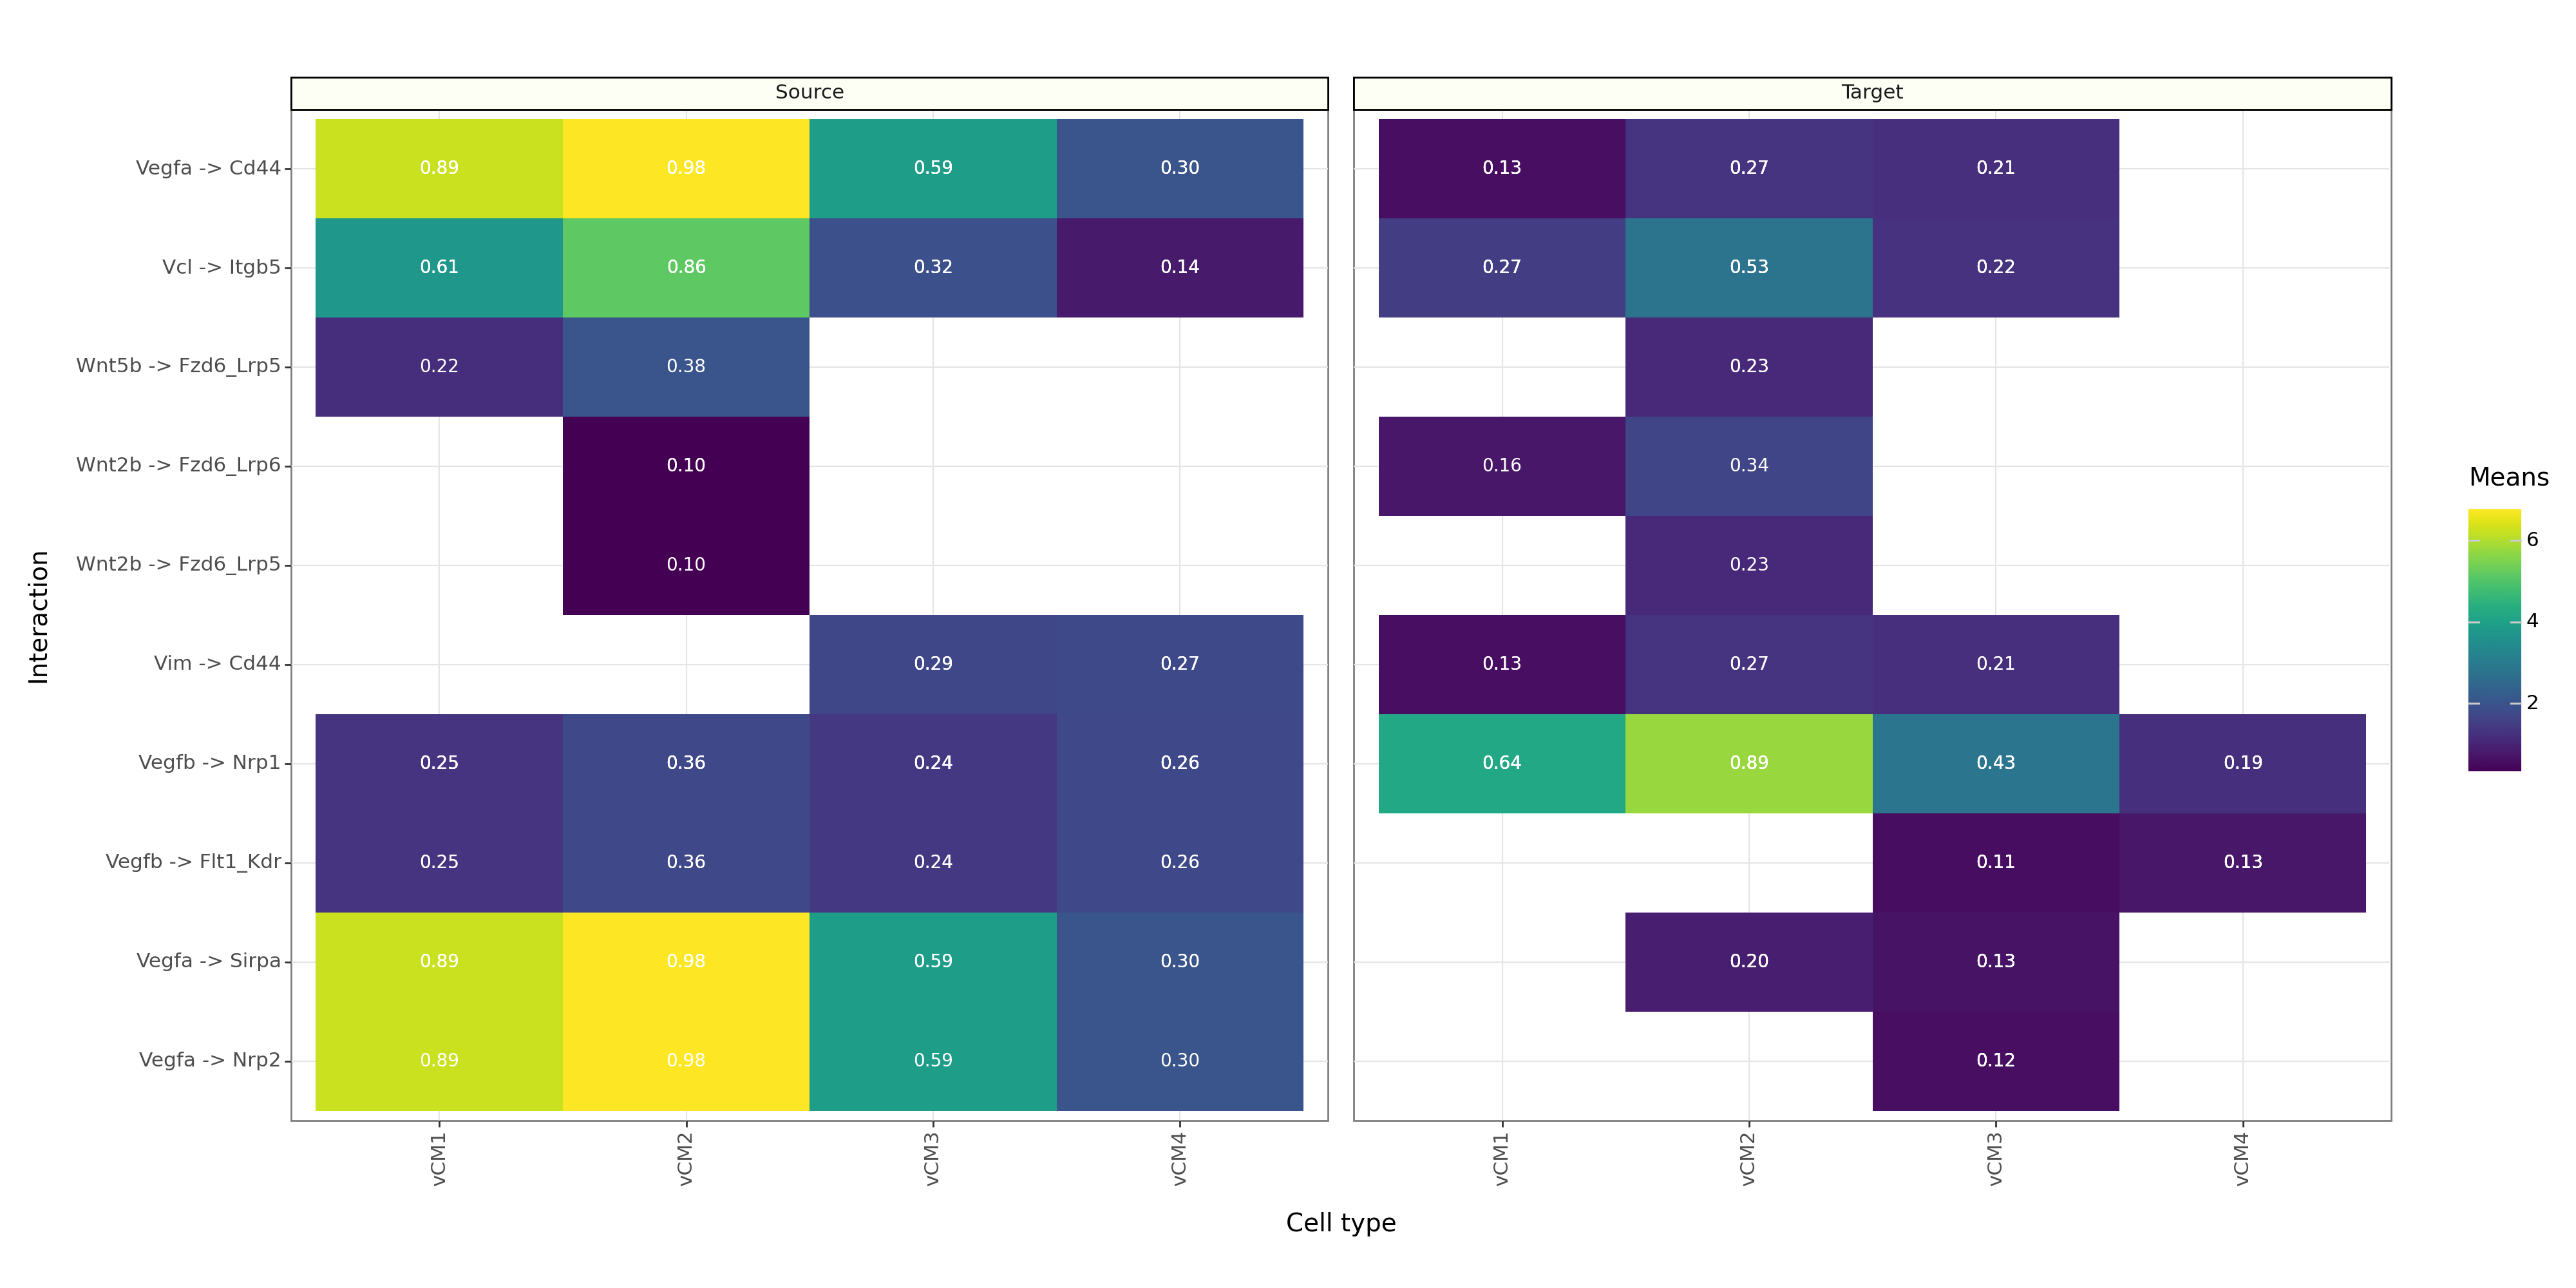

<Figure Size: (2000 x 1000)>

In [14]:
my_plot = li.pl.tileplot(adata = adata,
                         # NOTE: fill & label need to exist for both
                         # ligand_ and receptor_ columns
                         fill = 'means',
                         label = 'props',
                         label_fun = lambda x: f'{x:.2f}',
                         top_n = 10,
                         orderby = 'cellphone_pvals',
                         orderby_ascending = True,
                         figure_size = (20, 10),
                         source_labels = ['vCM1', 'vCM2', 'vCM3', 'vCM4'],
                         target_labels = ['vCM1', 'vCM2', 'vCM3', 'vCM4'],
                         uns_key = 'cpdb_res'
                         )
my_plot

### Run `cellchat` for trial

In [16]:
cellchat(adata, groupby = 'C_scANVI', 
            expr_prop = 0.1, 
            resource_name = 'mouseconsensus', 
            verbose = True, 
            key_added = 'ccdb_res',
            use_raw = False)
adata.uns['ccdb_res'].head()

Using `.X`!
/home/ruth/mambaforge/envs/liana+/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
8059 features of mat are empty, they will be removed.
/home/ruth/mambaforge/envs/liana+/lib/python3.10/site-packages/pandas/core/indexing.py:1819: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/home/ruth/mambaforge/envs/liana+/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:144: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
Using resource `mouseconsensus`.
0.12 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 8257 samples and 24226 features


 94%|█████████▍| 945/1000 [01:29<00:05, 10.63it/s]

In [ ]:
li.pl.dotplot(adata = adata,
              colour = 'lr_probs',
              size = 'cellchat_pvals',
              inverse_size = True, 
              source_labels = ['vCM1', 'vCM2', 'vCM3', 'vCM4'],
              target_labels = ['vCM1', 'vCM2', 'vCM3', 'vCM4'],
              figure_size = (25, 50),
              filterby = 'cellchat_pvals',
              filter_lambda = lambda x: x <= 0.05,
              uns_key = 'ccdb_res',
              cmap = 'magma'
             )

In [ ]:
my_plot = li.pl.tileplot(adata = adata,
                         # NOTE: fill & label need to exist for both
                         # ligand_ and receptor_ columns
                         fill = 'cellchat_pvals',
                         label = 'lr_probs',
                         label_fun = lambda x: f'{x:.2f}',
                         top_n = 10,
                         orderby = 'cellchat_pvals',
                         orderby_ascending = True,
                         figure_size = (20, 10),
                         source_labels = ['vCM1', 'vCM2', 'vCM3', 'vCM4'],
                         target_labels = ['vCM1', 'vCM2', 'vCM3', 'vCM4'],
                         uns_key = 'ccdb_res'
                         )
my_plot

### Run aggregated estimate 

In [ ]:
li.mt.rank_aggregate(adata_all, groupby = 'cell_states', expr_prop = 0.1, verbose = True, use_raw = False)
adata_all.uns['liana_res'].head()

In [ ]:
rank_aggregate.describe()